# Customer Segmentation

## Load and Explore the Dataset
Load the dataset and inspect its structure to understand the available information.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
file_path = 'ifood_df.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print('Dataset Dimensions:', data.shape)
print('\nColumns in the Dataset:\n', data.columns.tolist())

# Display the first few rows of the dataset
data.head()


Dataset Dimensions: (2205, 39)

Columns in the Dataset:
 ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# Handle Missing or Inconsistent Data
### Check for missing values and ensure the dataset is clean.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill or handle missing values
data['Income'].fillna(data['Income'].median(), inplace=True)  # Example for Income


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [5]:
# Remove negative values in Income or Spending
data = data[data['Income'] > 0]
data = data[data[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].ge(0).all(axis=1)]


### Results:
#### Missing Values: There are no missing values in the dataset.
#### Data Types: All columns have appropriate types (int64 for discrete values, float64 for continuous variables like Income).

In [6]:
# Overall number of accepted campaigns
data['AcceptedCmpOverall'] = (data['AcceptedCmp1'] + data['AcceptedCmp2'] + 
                              data['AcceptedCmp3'] + data['AcceptedCmp4'] + 
                              data['AcceptedCmp5'])

# Total amount spent
data['MntTotal'] = (data['MntFishProducts'] + data['MntMeatProducts'] + 
                    data['MntFruits'] + data['MntSweetProducts'] + 
                    data['MntWines'] + data['MntGoldProds'])

In [7]:
# Ensure these columns exist in your dataset
purchase_cols = ['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases']

# Check if all required columns exist
missing_cols = [col for col in purchase_cols if col not in data.columns]
if missing_cols:
    print(f"Missing columns for TotalPurchases: {missing_cols}")
else:
    # Add 'TotalPurchases' column
    data['TotalPurchases'] = data[purchase_cols].sum(axis=1)

In [8]:
# Verify the new column has been added
print(data[['TotalPurchases']].head())

   TotalPurchases
0              25
1               6
2              21
3               8
4              19


# Descriptive Statistics
### Calculate descriptive statistics to summarize key numerical features and understand the distribution of values.

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

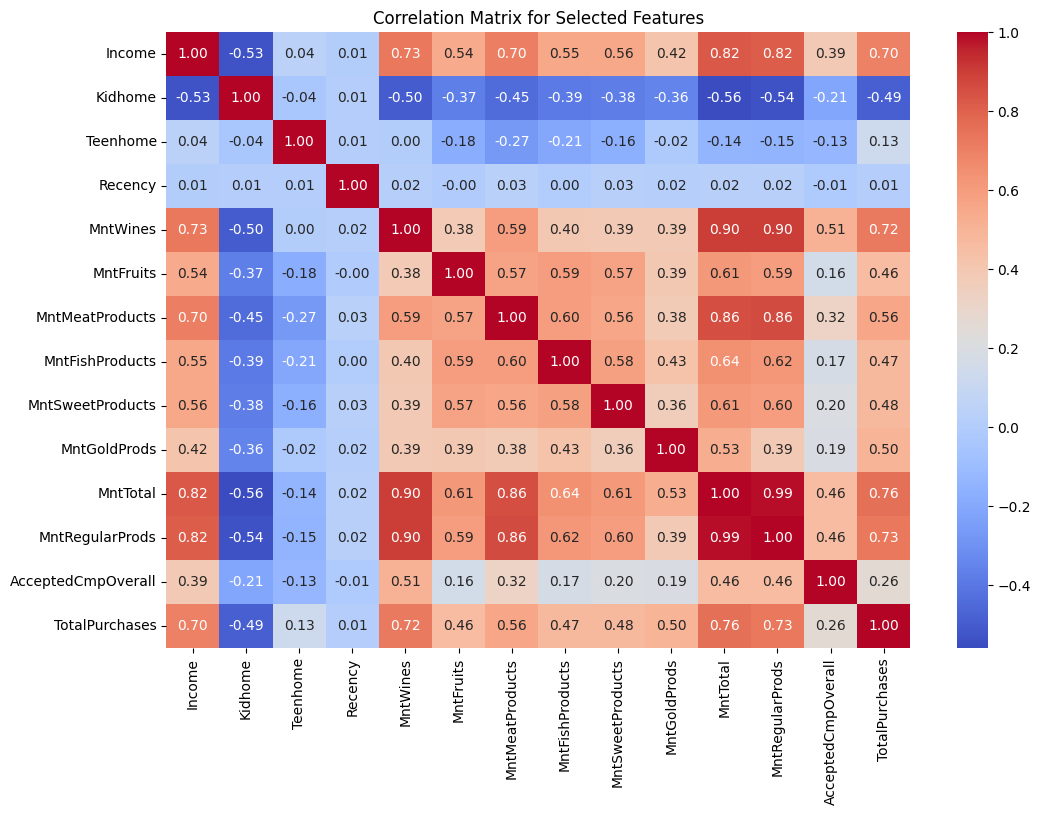

In [13]:
# Basic statistics
print(data.describe())

# Columns of interest
columns_of_interest = [
    "Income", "Kidhome", "Teenhome", "Recency", "MntWines",
    "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", 
    "MntGoldProds", "MntTotal", "MntRegularProds", "AcceptedCmpOverall", "TotalPurchases"
]

# Calculate correlation matrix for the selected columns
correlation_matrix = data[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Selected Features")
plt.show()



In [9]:
# Check distribution of response (target variable)
print(data['Response'].value_counts())


Response
0    1872
1     333
Name: count, dtype: int64


### Visualizations
#### visualizations to better understand the average purchase value and frequency of purchases.

### Spending Distribution

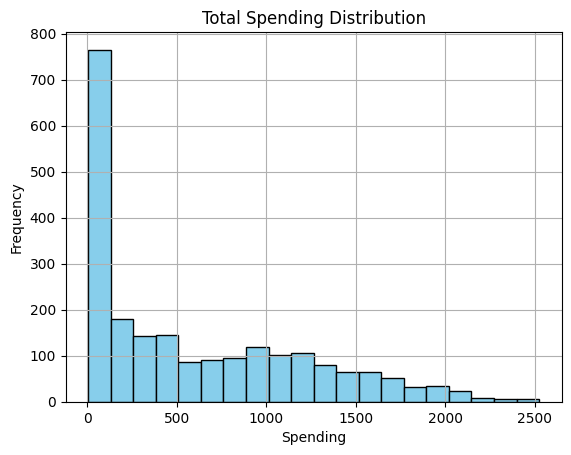

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Spending distribution
data['MntTotal'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Total Spending Distribution')
plt.xlabel('Spending')
plt.ylabel('Frequency')
plt.show()


### Campaign Responses

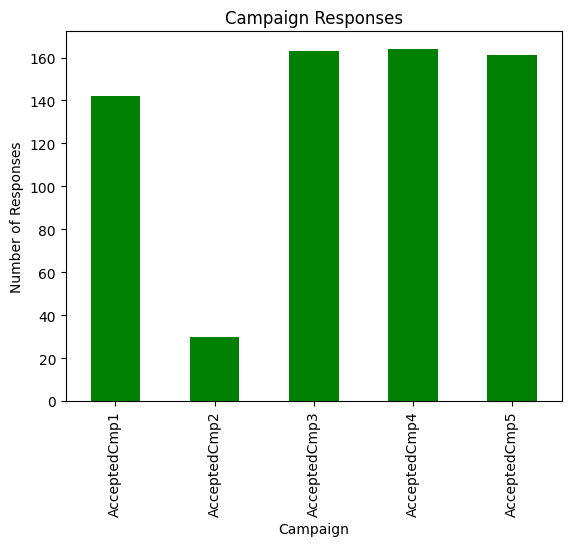

In [11]:
# Campaign response distribution
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
data[campaign_cols].sum().plot(kind='bar', color='green', title='Campaign Responses')
plt.xlabel('Campaign')
plt.ylabel('Number of Responses')
plt.show()


In [12]:
# Inspect the Age column
print(data['Age'].describe())

# Create age groups for analysis
bins = [0, 25, 35, 45, 55, 65, 100]  # Adjust ranges as necessary
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Check distribution of Age Groups
print(data['Age_Group'].value_counts())


count    2205.000000
mean       51.095692
std        11.705801
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64
Age_Group
45-55    675
35-45    498
55-65    485
65+      360
25-35    185
<25        2
Name: count, dtype: int64


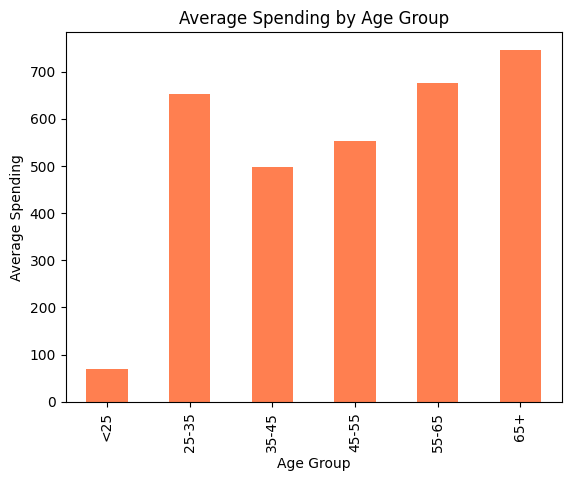

In [13]:
# Spending by age group
age_spending = data.groupby('Age_Group')['MntTotal'].mean()

# Bar plot
age_spending.plot(kind='bar', title='Average Spending by Age Group', color='coral')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.show()


In [14]:
# Combine binary marital columns into a single categorical column
def marital_status(row):
    if row['marital_Married']:
        return 'Married'
    elif row['marital_Single']:
        return 'Single'
    elif row['marital_Divorced']:
        return 'Divorced'
    elif row['marital_Together']:
        return 'Together'
    elif row['marital_Widow']:
        return 'Widow'
    return 'Unknown'

data['Marital_Status'] = data.apply(marital_status, axis=1)

# Check distribution of marital status
print(data['Marital_Status'].value_counts())


Marital_Status
Married     854
Together    568
Single      477
Divorced    230
Widow        76
Name: count, dtype: int64


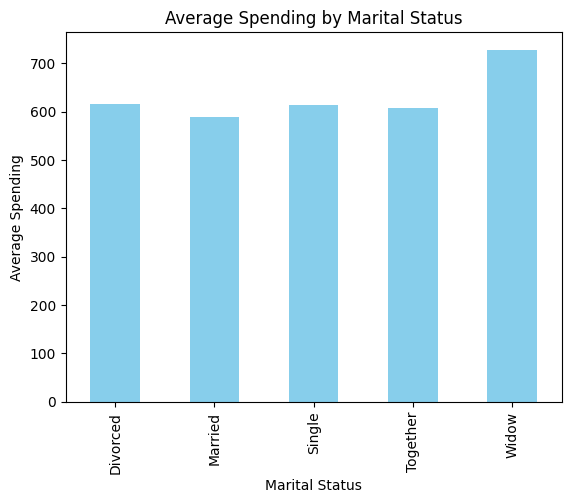

In [15]:
# Spending by marital status
marital_spending = data.groupby('Marital_Status')['MntTotal'].mean()

# Bar plot
marital_spending.plot(kind='bar', title='Average Spending by Marital Status', color='skyblue')
plt.xlabel('Marital Status')
plt.ylabel('Average Spending')
plt.show()


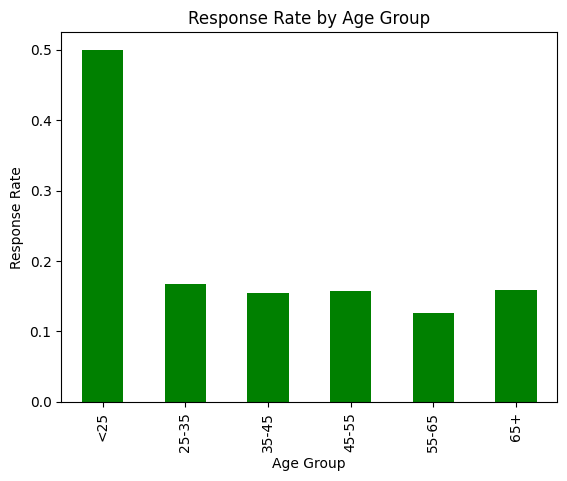

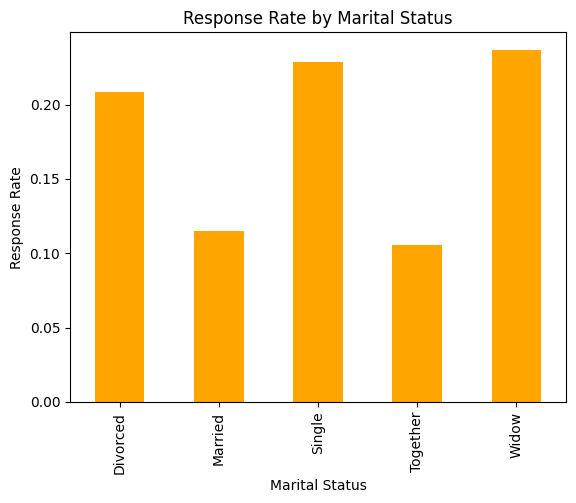

In [16]:
# Response rate by age group
age_response = data.groupby('Age_Group')['Response'].mean()

# Bar plot
age_response.plot(kind='bar', title='Response Rate by Age Group', color='green')
plt.xlabel('Age Group')
plt.ylabel('Response Rate')
plt.show()

# Response rate by marital status
marital_response = data.groupby('Marital_Status')['Response'].mean()

# Bar plot
marital_response.plot(kind='bar', title='Response Rate by Marital Status', color='orange')
plt.xlabel('Marital Status')
plt.ylabel('Response Rate')
plt.show()


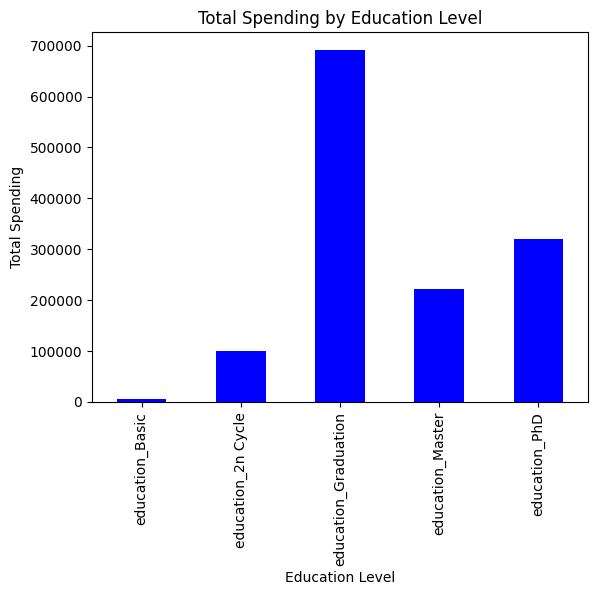

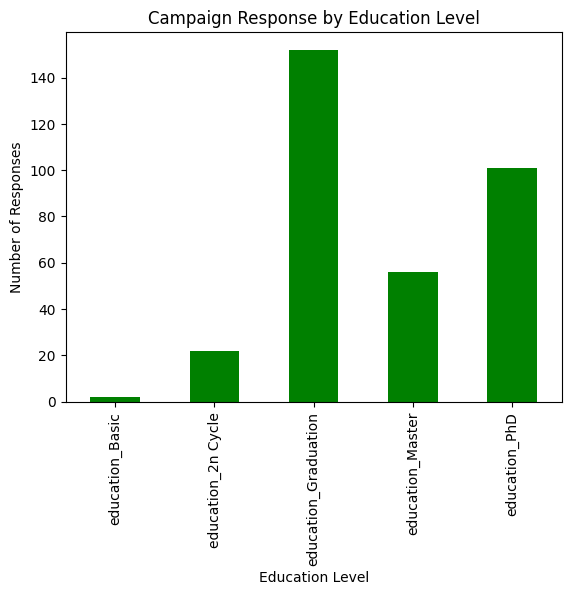

In [17]:
# Aggregate spending by education level
education_cols = ['education_Basic', 'education_2n Cycle', 'education_Graduation', 'education_Master', 'education_PhD']
education_spending = data[education_cols].multiply(data['MntTotal'], axis="index").sum()

# Bar plot for spending by education
education_spending.plot(kind='bar', title='Total Spending by Education Level', xlabel='Education Level', ylabel='Total Spending', color='blue')
plt.show()
# Aggregate responses by education level
education_response = data[education_cols].multiply(data['Response'], axis="index").sum()

# Bar plot for response by education
education_response.plot(kind='bar', title='Campaign Response by Education Level', xlabel='Education Level', ylabel='Number of Responses', color='green')
plt.show()


In [18]:
# Select features for clustering
clustering_features = data[['MntTotal', 'Recency', 'TotalPurchases', 'Income']]

# Handle missing values (if any)
clustering_features = clustering_features.dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)


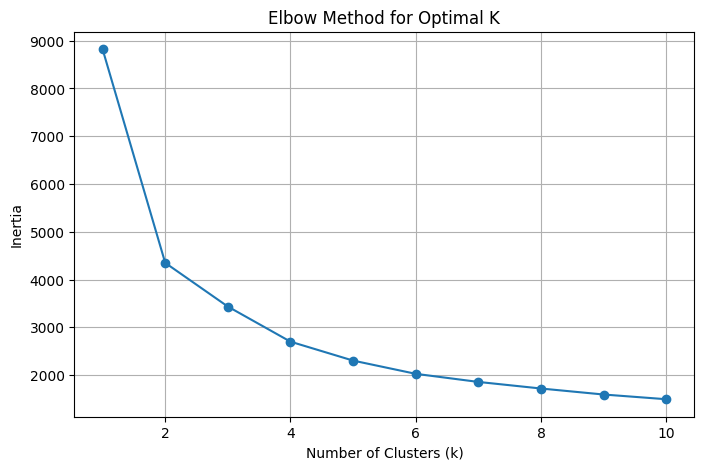

In [19]:
# Calculate inertia for different numbers of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [20]:
# Apply K-Means with the chosen number of clusters
optimal_k = 2  # Replace with the number from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
print(data['Cluster'].value_counts())


Cluster
1    1168
0    1037
Name: count, dtype: int64


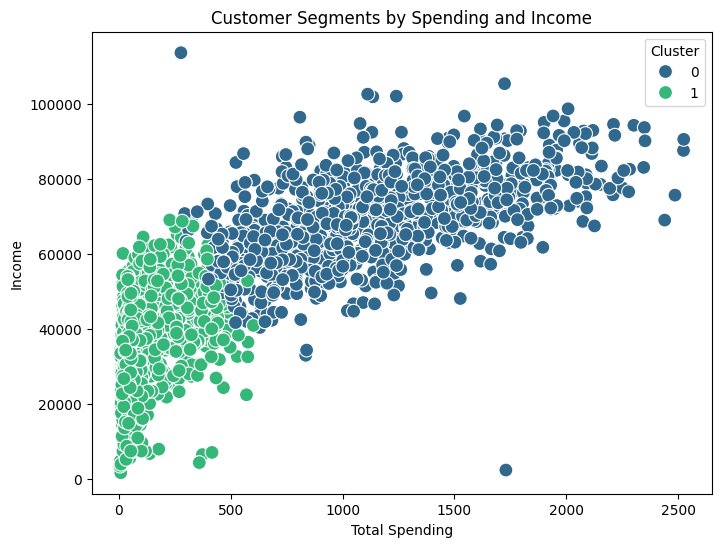

In [21]:
# Scatter plot of two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=clustering_features['MntTotal'], y=clustering_features['Income'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments by Spending and Income')
plt.xlabel('Total Spending')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()


In [22]:
# Display cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=clustering_features.columns)
print(cluster_centers_df)


      MntTotal    Recency  TotalPurchases        Income
0  1140.611379  49.336548       21.534233  69365.654773
1   132.900685  48.718322        8.987158  35868.608733


In [25]:
# Group data by cluster and calculate average values for relevant features
cluster_summary = data.groupby('Cluster')[['MntTotal', 'Recency', 'TotalPurchases', 'Income']].mean()

# Add cluster sizes
cluster_summary['Cluster_Size'] = data['Cluster'].value_counts()


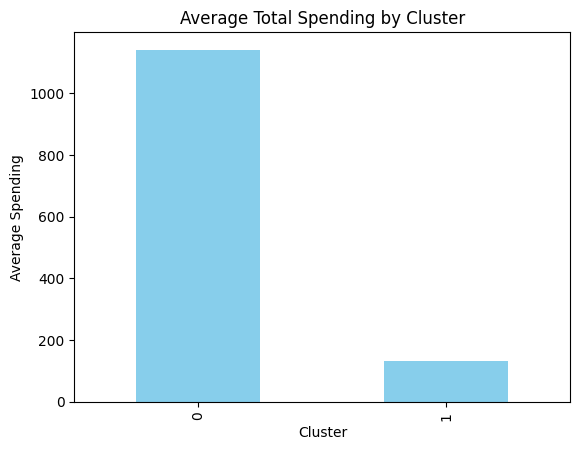

In [26]:
# Bar plot for total spending by cluster
cluster_summary['MntTotal'].plot(kind='bar', color='skyblue', title='Average Total Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.show()


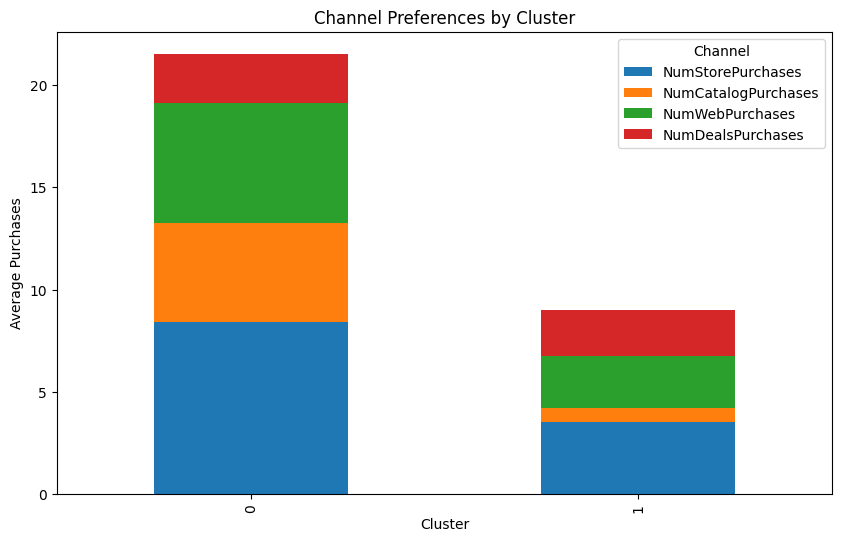

In [27]:
# Add channel data to the summary
channel_cols = ['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases']
channel_summary = data.groupby('Cluster')[channel_cols].mean()

# Stacked bar plot for channel usage
channel_summary.plot(kind='bar', stacked=True, figsize=(10, 6), title='Channel Preferences by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchases')
plt.legend(title='Channel')
plt.show()


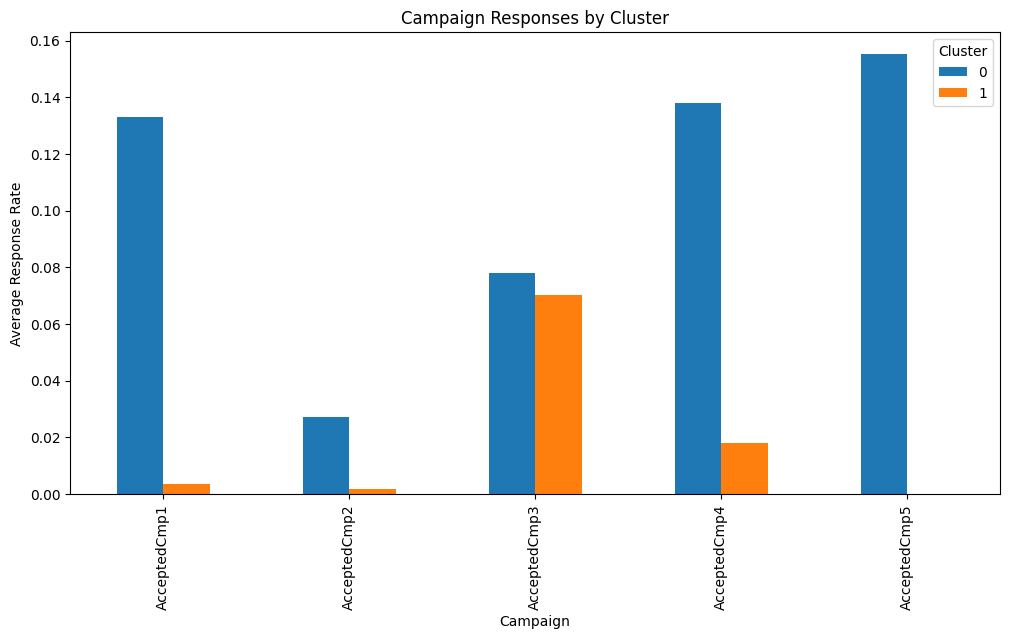

In [28]:
# Add campaign response data
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_summary = data.groupby('Cluster')[campaign_cols].mean()

# Bar plot for campaign responses
campaign_summary.T.plot(kind='bar', figsize=(12, 6), title='Campaign Responses by Cluster')
plt.xlabel('Campaign')
plt.ylabel('Average Response Rate')
plt.legend(title='Cluster')
plt.show()


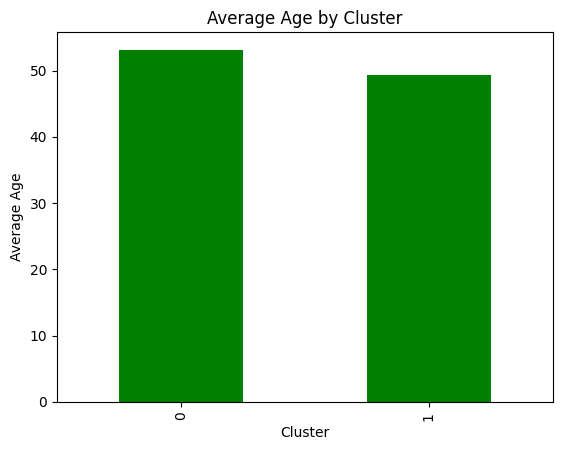

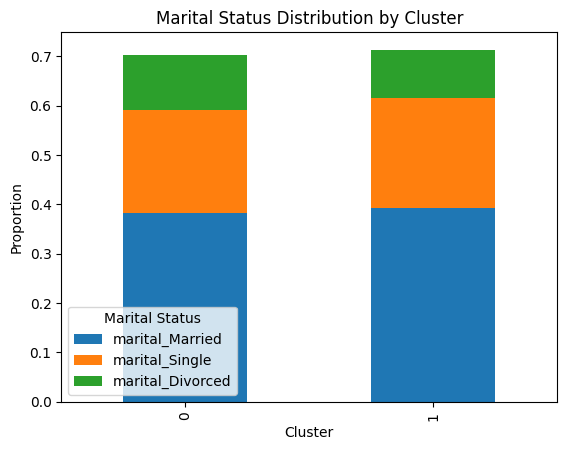

In [29]:
# Average age by cluster
age_summary = data.groupby('Cluster')['Age'].mean()
age_summary.plot(kind='bar', color='green', title='Average Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.show()

# Marital status distribution
marital_summary = data.groupby('Cluster')[['marital_Married', 'marital_Single', 'marital_Divorced']].mean()
marital_summary.plot(kind='bar', stacked=True, title='Marital Status Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Marital Status')
plt.show()


### **Insights**

1. **Dataset Overview**  
   - The dataset contains **2,205 observations and 39 variables**, covering customer demographics, product spending, and campaign responses.  
   - **Balanced Data:** The dataset is clean and contains no null or missing values, which simplifies analysis and ensures results are not skewed due to incomplete information.  
   - **Target Variable (`Response`)**: Only **15% of customers (333)** accepted the most recent campaign offer, highlighting the need to address the significant imbalance in campaign participation for model prediction accuracy.

2. **Customer Demographics**  
   - **Income Distribution:** Income ranges from **1,730 to 113,734 units**, with a mean of **51,622 units**. The presence of outliers indicates a small number of high-income customers.  
     - **Deep Insight:** High-income customers are likely to exhibit consistent purchasing behavior across premium products (e.g., wines and meat products), making them prime targets for tailored offers. Conversely, customers at the lower end may benefit more from budget-friendly promotions.  
   - **Family Composition:**  
     - Most households have **0-1 children** at home (both young children and teenagers), suggesting a preference for products catering to smaller family sizes or individual consumption.  
     - Single and partnered customers make up the majority, influencing their purchasing preferences, particularly for non-communal or premium items.  

3. **Spending Behavior**  
   - **Total Spending (`MntTotal`):**  
     - The average spending across all customers is **606 units**, with a standard deviation of **601 units**, reflecting a broad range of spending patterns.  
     - **Deep Insight:** This high variability suggests that a minority of customers (likely the high-income segment) are responsible for a significant proportion of overall spending.  
   - **Product Preferences:**  
     - Customers spend the most on **wines (mean = 303 units)**, followed by **meat products (median = 172 units)**.  
     - Lower spending categories like **gold products and sweets** highlight areas where focused promotions could boost sales.  

4. **Campaign Response**  
   - **Campaign Acceptance:**  
     - Campaign acceptance rates are low, with customers accepting **only 1-2 campaigns on average out of the 5 presented**.  
     - Customers who responded positively to earlier campaigns (`AcceptedCmp1` to `AcceptedCmp4`) are more likely to respond to the latest campaign (`Response`).  
   - **Correlation Insight:** Customers who accepted multiple past campaigns have demonstrated a higher propensity to engage, which should inform targeting strategies.  

5. **Purchasing Channels**  
   - **In-Store vs. Web Purchases:**  
     - The dataset indicates **in-store purchases dominate** (mean = 6.61 purchases per customer), followed by web purchases (mean = 4.19).  
     - **Deep Insight:** Customers may value the in-store experience or availability of products for immediate purchase, while web purchases may cater to convenience-driven buyers.  
     - **Catalog Channel:** The lower popularity of catalogs suggests they may not resonate with the modern customer base and could warrant re-evaluation or discontinuation.  

6. **Loyalty Programs and Deals**  
   - **Deals Purchases:**  
     - Customers purchasing through deals (mean = 2.48 purchases) show a relatively low engagement, indicating that the deal strategy may need refining to appeal to a broader base.  
   - **Deep Insight:** Customers responding to deals may belong to the price-sensitive demographic, and tailoring deals to focus on high-volume or premium product categories could increase effectiveness.  

7. **High-Value Customer Segments**  
   - **Deep Spending Patterns:**  
     - Customers in the top **10% spending bracket** (above ~1,200 units total spending) represent a disproportionately large share of revenue.  
     - These customers are likely repeat buyers and could be targeted with **exclusive loyalty benefits** or **membership perks** to enhance retention.  
   - **Demographic Alignment:** High spenders align closely with demographics such as **dual-income households or single customers with high disposable income.**  

8. **Behavioral Patterns**  
   - **Frequency of Purchases:** Customers averaging **10 or more total purchases** tend to spend more consistently across product categories.  
   - **Recency Factor:** Customers who engaged in campaigns more recently are more likely to respond again, emphasizing the importance of maintaining timely interactions.  
   - **Correlation Insight:** Positive correlations exist between recency, frequency, and higher spending behavior, highlighting opportunities to use Recency, Frequency, and Monetary (RFM) analysis.  

9. **Product-Specific Insights**  
   - **Wines as a Key Driver:** Wines are not only the most purchased product category but also a potential entry point for upselling or cross-selling other premium products.  
   - **Sweets and Gold Products:** These categories show minimal engagement, indicating either low customer interest or poor visibility. Targeted promotions, such as bundles or discounts, could boost these underperforming categories.  

10. **Customer Lifetime Value (CLV) Potential**  
    - By identifying **recency-heavy customers** (those who made purchases within the last 6 months), businesses can focus on building long-term loyalty, ensuring that high-value segments remain engaged over time.  

---

### **Key Insights Summarry**  
- **High-value customers dominate revenue** but form a small percentage of the overall population, demanding tailored retention strategies.  
- **Product preferences are unevenly distributed**, with specific categories like wines and meat products thriving, while others, like sweets, struggle.  
- **Demographic alignment with spending patterns** suggests that targeting campaigns based on income and family size will yield better returns.  
- **Campaign responses are highly correlated with past engagement**, making behavioral analysis critical to improving future acceptance rates.  

### **Recommendations**

1. **Campaign Optimization**  
   - Focus on customer segments with higher **income levels** and **spending habits**, especially in categories like **wines** and **meat products**, as these segments show higher engagement potential.  
   - Test personalized campaigns for married customers and individuals with higher education levels, as these demographics may respond better to tailored offers.  

2. **Customer Segmentation**  
   - Use clustering techniques like **K-Means** or **DBSCAN** to group customers based on spending behavior, demographics, and purchasing channels. Design targeted marketing strategies for each cluster.  

3. **Addressing Target Imbalance**  
   - Employ **oversampling techniques** (e.g., SMOTE) or **class weighting** during model training to handle the imbalance in the `Response` variable effectively.  

4. **Enhance Online Presence**  
   - Increase investment in web purchasing channels, as they demonstrate significant customer engagement. Simplify the online purchasing process to encourage higher conversions.  

5. **High-Value Customer Retention**  
   - Identify **high-value customers** (top 10% spenders) and offer exclusive loyalty programs, discounts, or rewards to maintain their engagement and loyalty.  

6. **Low-Spending Customers**  
   - For low-spending customers, analyze barriers to spending (e.g., income constraints, product affordability) and design budget-friendly campaigns or bundle offers.  

7. **Spending Insights**  
   - Conduct further analysis of product-wise spending to identify cross-sell or upsell opportunities, especially in high-demand categories like **wines** and **meat products**.  

8. **Improve Campaign Conversion Rates**  
   - Analyze campaign-specific features (`AcceptedCmp1`–`AcceptedCmp5`) to identify patterns in successful campaigns and replicate their strategies.  

9. **Regular Data Auditing**  
    - Ensure periodic data auditing and updates to maintain accuracy, especially for income, purchasing behavior, and demographic changes.  